<a href="https://colab.research.google.com/github/Swasthik99/Movie_Ticket_booking_system/blob/main/mnist_sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swasthik99","key":"448afa68c61e9534c17490d3334addae"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sm261998/mnist-sign-language

100% 62.6M/62.6M [00:00<00:00, 147MB/s]
100% 62.6M/62.6M [00:00<00:00, 124MB/s]


In [ ]:
%ls

kaggle.json  mnist-sign-language.zip  sample_data/


In [ ]:
!unzip mnist-sign-language

Archive:  mnist-sign-language.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get our Training and Test Data
train = pd.read_csv('/content/dataset/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/dataset/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
# Inspect our Training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
#get our training models
labels = train['label'].values


In [ ]:
#view the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

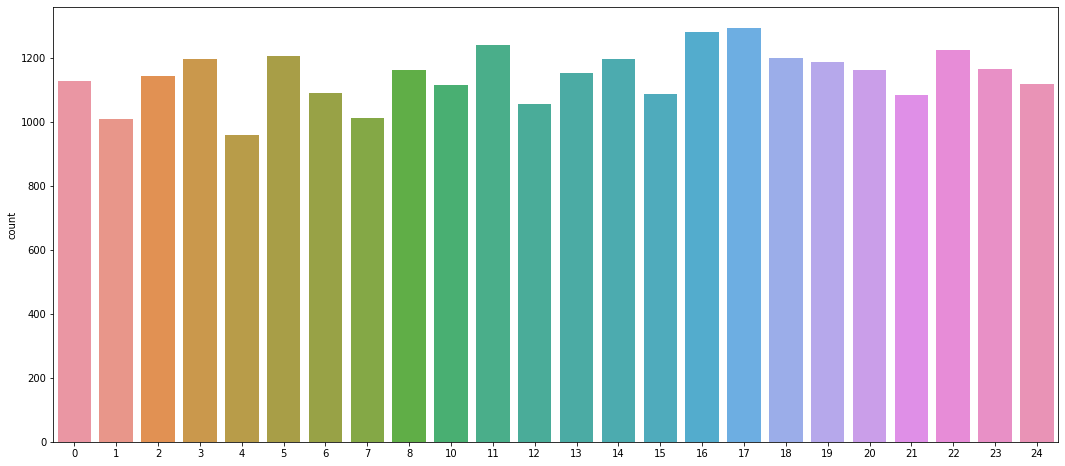

In [ ]:
#plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [ ]:
# drop training labels from our  training data so we can seperate it
train.drop('label', axis = 1, inplace = True) 

In [ ]:
#Extract the image data from each row in our csv , remember it is in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])


In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [ ]:
# view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


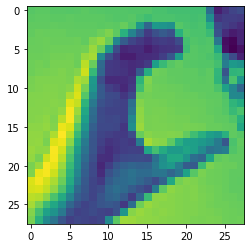

In [ ]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

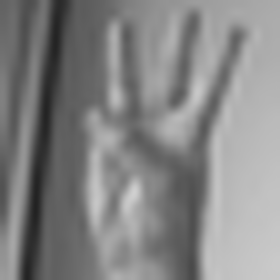

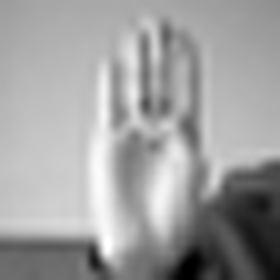

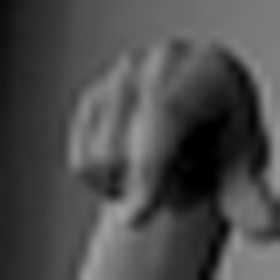

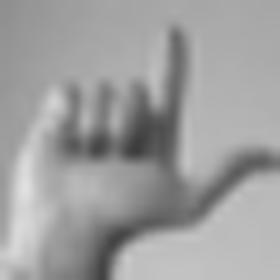

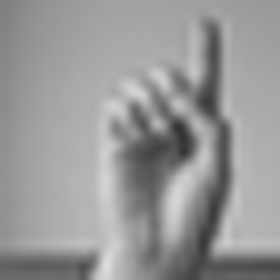

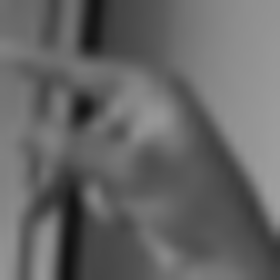

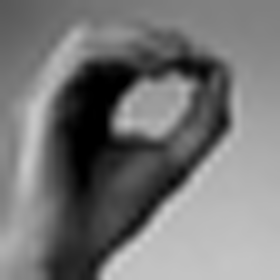

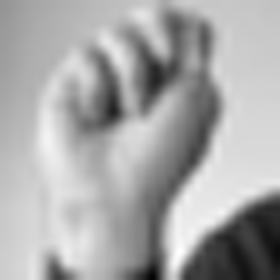

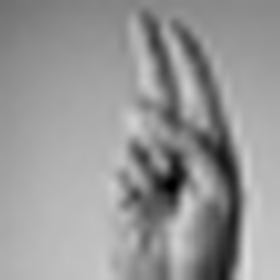

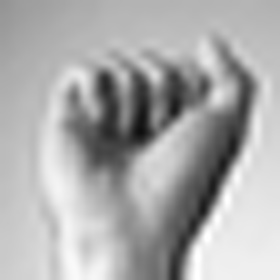

In [ ]:
# use opencv to view  10 random images from our training data
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(0,10):
  rand = np.random.randint(0, len(images))
  input_im = images[rand]

  sample = input_im.reshape(28,28).astype(np.uint8)
  sample = cv2.resize(sample, None, fx=10,fy=10, interpolation = cv2.INTER_CUBIC)
  cv2_imshow(sample)
  cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:
# Split our data into x_train, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)


In [ ]:
# Strat loading our tensorflow modules and define our batch size ect
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
# Scale our image
x_train = x_train / 255
x_test = x_test / 255


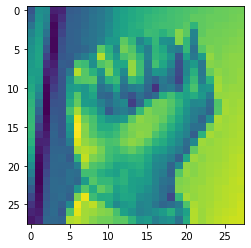

In [ ]:
# Reshape them into the size requird by TF and keras
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# Creat our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile our model
model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(),
              metrics = ['accuracy'])

In [ ]:

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 2s 10ms/step - loss: 3.1451 - accuracy: 0.0628 - val_loss: 3.0803 - val_accuracy: 0.1022
Epoch 2/10
151/151 [==============================] - 1s 9ms/step - loss: 3.0402 - accuracy: 0.0987 - val_loss: 2.9826 - val_accuracy: 0.1396
Epoch 3/10
151/151 [==============================] - 1s 8ms/step - loss: 2.9345 - accuracy: 0.1335 - val_loss: 2.8616 - val_accuracy: 0.1581
Epoch 4/10
151/151 [==============================] - 1s 9ms/step - loss: 2.8119 - accuracy: 0.1401 - val_loss: 2.7253 - val_accuracy: 0.1722
Epoch 5/10
151/151 [==============================] - 1s 9ms/step - loss: 2.6985 - accuracy: 0.1455 - val_loss: 2.6153 - val_accuracy: 0.1675
Epoch 6/10
151/151 [==============================] - 1s 8ms/step - loss: 2.5865 - accuracy: 0.1525 - val_loss: 2.4907 - val_accuracy: 0.1731
Epoch 7/10
151/151 [==============================] - 1s 9ms/step - loss: 2.4983 - accuracy: 0.1548 - val_loss: 2.4019 - val_accuracy: 0.1736
Epoch

In [ ]:
# Save our model
model.save('sign_mnist_cnn_50_Epochs.h5')
print("model saved")

model saved


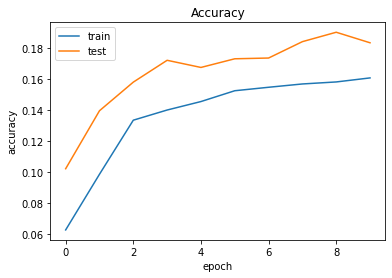

In [ ]:
# view our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
#Reshape our test data so taht we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis=1, inplace= True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images
y_pred = model.predict(test_images)

In [ ]:
# get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())


0.0

In [ ]:
# create function to match label to letter
def getLetter(result):
  classlabels = { 0:'A',
                 1:'B',
                 2:'C',
                 3:'D',
                 4:'E',
                 5:'F',
                 6:'G',
                 7:'H',
                 8:'I',
                 9:'K',
                 10:'L',
                 11:'M',
                 12:'N',
                 13:'O',
                 14:'P',
                 15:'Q',
                 16:'R',
                 17:'S',
                 18:'T',
                 19:'U',
                 20:'V',
                 21:'W',
                 22:'X',
                 23:'Y'}
  try:
      res = int(result)
      return classLabels[res]
  except:
      return "Error"

  

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame=cv2.flip(frame, 1)
    #define region of interest

    roi = frame[100:400, 320:620]
    cv2.imshow("roi", roi)

    roi =cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)

    copy=frame.copy()

    cv2.rectangle(copy, (320, 100), (628, 400), (255,0,0), 5)

    roi = roi.reshape(1,28,28,1)

    result = str(model.predict_classes (roi, 1, verbose= 0)[0])
    cv2.putText(copy, getLetter (result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (8, 255, 0), 2)
    cv2.imshow("frame", copy)

    if cv2.waitKey(1)==13:  #13 is the Enter key
        break
cap.release()
cv2.destroyAllWindows()

TypeError: ignored